In [19]:
#3.4.3
#3.4.3
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

import numpy as np
import random

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

print(x_val.shape)
print(y_val.shape)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

print(history.history.keys())


(10000, 10000)
(10000,)
Epoch 1/10
30/30 [==============================] - 1s 27ms/step - loss: 0.5174 - acc: 0.7897 - val_loss: 0.3934 - val_acc: 0.8694
Epoch 2/10
30/30 [==============================] - 0s 13ms/step - loss: 0.3123 - acc: 0.9022 - val_loss: 0.3088 - val_acc: 0.8875
Epoch 3/10
30/30 [==============================] - 0s 13ms/step - loss: 0.2304 - acc: 0.9269 - val_loss: 0.2914 - val_acc: 0.8837
Epoch 4/10
30/30 [==============================] - 0s 12ms/step - loss: 0.1832 - acc: 0.9411 - val_loss: 0.2793 - val_acc: 0.8855
Epoch 5/10
30/30 [==============================] - 0s 12ms/step - loss: 0.1466 - acc: 0.9547 - val_loss: 0.3174 - val_acc: 0.8746
Epoch 6/10
30/30 [==============================] - 0s 13ms/step - loss: 0.1237 - acc: 0.9633 - val_loss: 0.2872 - val_acc: 0.8867
Epoch 7/10
30/30 [==============================] - 0s 13ms/step - loss: 0.0998 - acc: 0.9717 - val_loss: 0.3035 - val_acc: 0.8846
Epoch 8/10
30/30 [==============================] - 0s 12ms

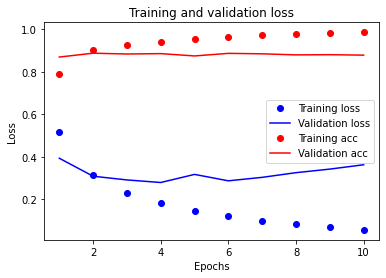

In [20]:
#3.4.4
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()